- 'join'은 인덱스를 따라 두 개의 DataFrame을 병합. 특정 인덱스가 설정되지 않은 경우 기본 정수 인덱스를 사용.
- Pandas에서 조인하는 기본 방법은 '왼쪽' 조인. 즉, 왼쪽 DataFrame의 모든 행이 출력에 포함되고 오른쪽 DataFrame의 행은 인덱스가 일치하는 경우에만 포함.
- 'join'의 기본 구문
  - DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)
  - other: 첫 번째 데이터프레임에 조인할 DataFrame
  - on: other DataFrame에서 조인할 열 또는 인덱스 수준 이름. 이는 선택 사항이며 지정하지 않으면 other의 인덱스가 사용된다.
  - how: 일치하지 않는 인덱스를 처리하는 방법을 지정합니다. 옵션은 왼쪽, 오른쪽, 외부, 내부이다.
  - lsuffix 및 rsuffix: 왼쪽 및 오른쪽 DataFrame에서 각각 겹치는 열 이름에 적용할 접미사입니다.
  - sort: 결과 DataFrame에서 조인 키를 사전순으로 정렬합니다.
- join 유형
  - 왼쪽 조인(how='left'): 왼쪽 DataFrame의 모든 행과 오른쪽 DataFrame의 일치하는 행을 포함. 일치하지 않는 행은 오른쪽 DataFrame의 열에 'NaN'을 갖는다.
  오른쪽 조인(how='right'): 오른쪽 DataFrame의 모든 행과 왼쪽 DataFrame의 일치하는 행을 포함. 일치하지 않는 행은 왼쪽 DataFrame의 열에 'NaN'을 갖는다.
  내부 조인(how='inner'): 두 DataFrame의 인덱스가 일치하는 행만 포함.
  외부 조인(how='outer'): 일치하는 항목이 없는 열에 NaN을 포함하여 두 DataFrame의 모든 행을 포함.

In [1]:
import pandas as pd

# Creating the first DataFrame
data1 = {'A':[1,2,3],'B':[4,5,6]}
df1 = pd.DataFrame(data1, index = ['a','b','c'])
print(df1, '\n')

# Creating the second DataFrame
data2 = {'C': [7,8,9],'D':[10,11,12]}
df2 = pd.DataFrame(data2, index = ['b','c','d'])
print(df2)

   A  B
a  1  4
b  2  5
c  3  6 

   C   D
b  7  10
c  8  11
d  9  12


In [6]:
left_join = df1.join(df2,how='left')
left_join

,A,B,C,D
a,1,4,NaN,NaN
b,2,5,7.0,10.0
c,3,6,8.0,11.0


In [7]:
right_join = df1.join(df2,how='right')
right_join

,A,B,C,D
b,2.0,5.0,7,10
c,3.0,6.0,8,11
d,NaN,NaN,9,12


In [8]:
outer_join = df1.join(df2,how='outer')
outer_join

,A,B,C,D
a,1.0,4.0,NaN,NaN
b,2.0,5.0,7.0,10.0
c,3.0,6.0,8.0,11.0
d,NaN,NaN,9.0,12.0


In [9]:
inner_join = df1.join(df2,how='inner')
inner_join

,A,B,C,D
b,2,5,7,10
c,3,6,8,11


In [12]:
import pandas as pd
df1 = pd.read_csv('dataset/file_data.csv')
df1

,차림표,가격
0,냉면,5000
1,칼국수,6000
2,잔치국수,7000
3,수제비,8000
4,우동,9000


In [30]:
df2 = pd.DataFrame({
    '차림표':['비빔밥','돈까스','라면','김밥','제육덮밥'],
    '가격':[7000,8000,3000,3000,9000]
})

df2

,차림표,가격
0,비빔밥,7000
1,돈까스,8000
2,라면,3000
3,김밥,3000
4,제육덮밥,9000


In [23]:
menu = df1.join(df2,lsuffix = '_a',rsuffix = '_b')
menu

,차림표_a,가격_a,차림표_b,가격_b
0,냉면,5000,비빔밥,7000
1,칼국수,6000,돈까스,8000
2,잔치국수,7000,라면,3000
3,수제비,8000,김밥,3000
4,우동,9000,제육덮밥,9000


In [38]:
columns = {'차림표':'메뉴2','가격':'가격2'}
df4 = df2.rename(columns=columns)
df4

,메뉴2,가격2
0,비빔밥,7000
1,돈까스,8000
2,라면,3000
3,김밥,3000
4,제육덮밥,9000


In [39]:
df5 = df1.join(df4)
df5

,차림표,가격,메뉴2,가격2
0,냉면,5000,비빔밥,7000
1,칼국수,6000,돈까스,8000
2,잔치국수,7000,라면,3000
3,수제비,8000,김밥,3000
4,우동,9000,제육덮밥,9000


과제1_1130. df5에서 가격이 평균값 이상인 경우만 출력하세요.

In [40]:
price_mean = df5.가격.mean()
df5[df5['가격']>=price_mean]

,차림표,가격,메뉴2,가격2
2,잔치국수,7000,라면,3000
3,수제비,8000,김밥,3000
4,우동,9000,제육덮밥,9000


과제2_1130. df5에서 가격이 6000원 이상인 경우의 행 인덱스를 출력하세요.

In [41]:
df5[df5['가격']>=6000].index

Index([1, 2, 3, 4], dtype='int64')

과제3_1130. df5에서 가격이 6000원 이상이고 가격2는 3000원이고 메뉴2가 '김밥'인 것만 출력하세요.

In [45]:
df5[(df5.가격 >= 6000) & (df5.가격2 == 3000) & (df5.메뉴2 == '김밥')]

,차림표,가격,메뉴2,가격2
3,수제비,8000,김밥,3000


In [ ]:
과제4_1130. df5에서 가격이 6000원 이상이거나 가격2는 3000원이거나 메뉴2가 '김밥'인 것만 출력하세요.

In [46]:
df5[(df5.가격 >= 6000) | (df5.가격2 == 3000) | (df5.메뉴2 == '김밥')]

,차림표,가격,메뉴2,가격2
1,칼국수,6000,돈까스,8000
2,잔치국수,7000,라면,3000
3,수제비,8000,김밥,3000
4,우동,9000,제육덮밥,9000


In [48]:
a1 = df5['가격'] >= 6000
a2 = df5['가격2'] == 3000
a3 = df5['메뉴2'] == '김밥'
df5[a1 | a2 | a3]

,차림표,가격,메뉴2,가격2
1,칼국수,6000,돈까스,8000
2,잔치국수,7000,라면,3000
3,수제비,8000,김밥,3000
4,우동,9000,제육덮밥,9000


In [50]:
pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     ------ -------------------------------- 41.0/250.0 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
df1 = pd.read_excel('dataset/stock price.xlsx',engine='openpyxl',index_col='id')
df2 = pd.read_excel('dataset/stock valuation.xlsx',engine='openpyxl',index_col='id')
print(df1, '\n')
print(df2)

       stock_name          value   price
id                                      
128940       한미약품   59385.666667  421000
130960     CJ E&M   58540.666667   98900
138250      엔에스쇼핑   14558.666667   13200
139480        이마트  239230.833333  254500
142280     녹십자엠에스     468.833333   10200
145990        삼양사   82750.000000   82000
185750        종근당   40293.666667  100500
192400      쿠쿠홀딩스  179204.666667  177500
199800         툴젠   -2514.333333  115400
204210     모두투어리츠    3093.333333    3475 

             name           eps     bps        per       pbr
id                                                          
130960     CJ E&M   6301.333333   54068  15.695091  1.829178
136480         하림    274.166667    3551  11.489362  0.887074
138040    메리츠금융지주   2122.333333   14894   6.313806  0.899691
139480        이마트  18268.166667  295780  13.931338  0.860437
145990        삼양사   5741.000000  108090  14.283226  0.758627
161390      한국타이어   5648.500000   51341   7.453306  0.820007
181710  NHN엔터테인먼트 

In [2]:
#Q. df1,df2 데이터프레임 결합(join)

df3=df1.join(df2) #default : how = left
df3

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
128940,한미약품,59385.666667,421000,NaN,NaN,NaN,NaN,NaN
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068.0,15.695091,1.829178
138250,엔에스쇼핑,14558.666667,13200,NaN,NaN,NaN,NaN,NaN
139480,이마트,239230.833333,254500,이마트,18268.166667,295780.0,13.931338,0.860437
142280,녹십자엠에스,468.833333,10200,NaN,NaN,NaN,NaN,NaN
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090.0,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684.0,25.185866,2.470259
192400,쿠쿠홀딩스,179204.666667,177500,NaN,NaN,NaN,NaN,NaN
199800,툴젠,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN


In [3]:
df4=df1.join(df2, how='right')
df4

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900.0,CJ E&M,6301.333333,54068,15.695091,1.829178
136480,NaN,NaN,NaN,하림,274.166667,3551,11.489362,0.887074
138040,NaN,NaN,NaN,메리츠금융지주,2122.333333,14894,6.313806,0.899691
139480,이마트,239230.833333,254500.0,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000.0,삼양사,5741.000000,108090,14.283226,0.758627
161390,NaN,NaN,NaN,한국타이어,5648.500000,51341,7.453306,0.820007
181710,NaN,NaN,NaN,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
185750,종근당,40293.666667,100500.0,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475.0,모두투어리츠,85.166667,5335,40.802348,0.651359


In [4]:
# 데이터프레임 결합(join) - 교집합
df5=df1.join(df2, how='inner')
df5

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


과제5_1130. df5에서 중복된 칼럼을 삭제한 후 블린 인덱싱을 이용하여 epos가 3000 보다 적거나 stock_name이 이마트인 데이터를 선택하여 데이터프레임을 생성하고 df6 이름으로 저장 및 출력하세요. (단, '<'와 '=='를 반드시 사용해야 함)

In [11]:
df5 = df5.drop('name',axis = 1)
#df5.drop('name',axis=1, inplac=True)
df6 = df5[(df5['eps'] < 3000) | (df5['stock_name']=='이마트')]
df6

,stock_name,value,price,eps,bps,per,pbr
id,,,,,,,
139480,이마트,239230.833333,254500,18268.166667,295780,13.931338,0.860437
204210,모두투어리츠,3093.333333,3475,85.166667,5335,40.802348,0.651359


In [15]:
import numpy as np
df_j = pd.DataFrame(np.random.randint(10,size=(5,5)))
df_j

,0,1,2,3,4
0,5,6,4,9,1
1,9,0,5,0,0
2,9,1,4,9,0
3,7,4,2,2,3
4,9,9,5,9,8


In [16]:
df_j.to_json('dataset/df_j.json')
df_j = pd.read_json('./dataset/df_j.json') #. 이라는 것은 현재폴더
df_j

#상대경로 : 현재폴더를 기준
#절대경로 : C 부터 

,0,1,2,3,4
0,5,6,4,9,1
1,9,0,5,0,0
2,9,1,4,9,0
3,7,4,2,2,3
4,9,9,5,9,8


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 샘플 데이터 생성
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'C': [2, 3, 4, 1, 2],
    'D': [3, 3, 3, 3, 3]
}
df = pd.DataFrame(data)
df

,A,B,C,D
0,1,5,2,3
1,2,4,3,3
2,3,3,4,3
3,4,2,1,3
4,5,1,2,3


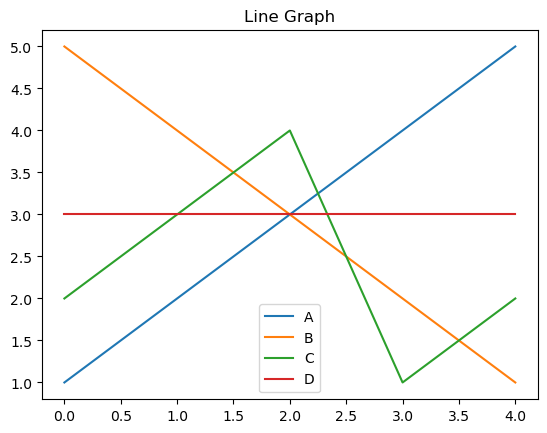

In [28]:
# 선 그래프
df.plot() # 디폴트: kind = 'line' 
plt.title('Line Graph')
plt.show() # 주피터에서는 안 넣어도 되지만 다른데는 show 해야지 보여줌.

<Axes: >

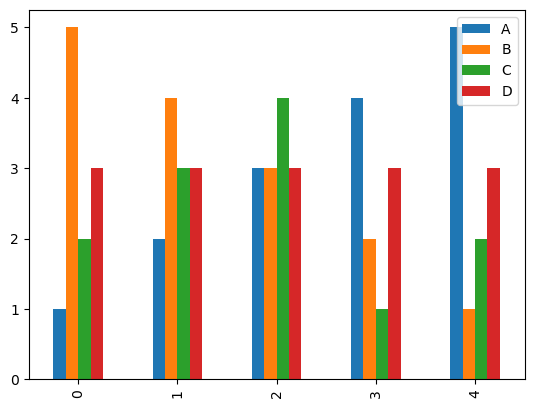

In [22]:
# 막대 그래프
df.plot(kind = 'bar')

<Axes: ylabel='Frequency'>

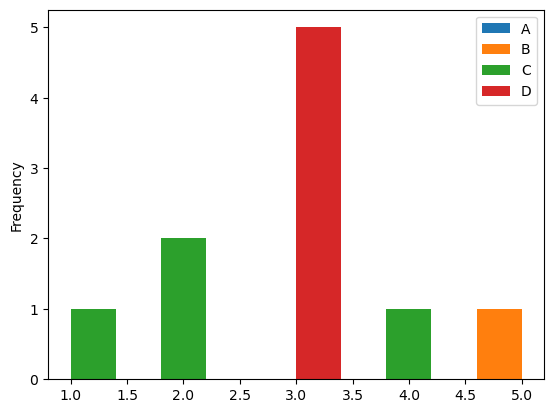

In [24]:
# 히스토그램
df.plot(kind='hist')

<Axes: >

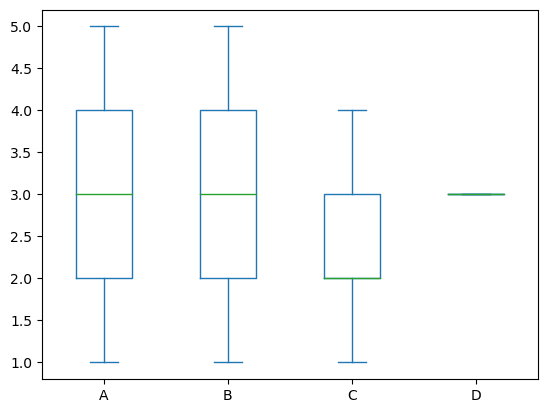

In [25]:
# 박스 플롯
df.plot(kind='box')

Text(0, 0.5, '')

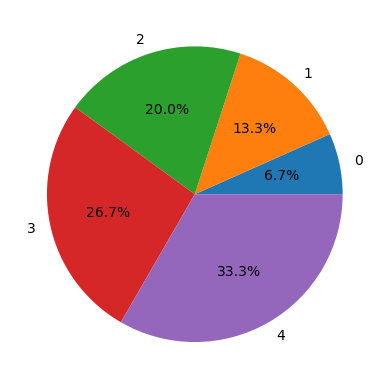

In [29]:
# 파이 차트
df['A'].plot(kind='pie', autopct='%1.1f%%') #autopct 하면 퍼센트를 집어넣을 수 있다.
plt.ylabel('')

In [31]:
df_ep = pd.read_excel('dataset/df_ep.xlsx')
df_ep.head()

,year,south,notth
0,1990,1077,277
1,1991,1186,263
2,1992,1310,247
3,1993,1444,221
4,1994,1650,231


In [32]:
df_ep.set_index('year',inplace=True)
df_ep.head()

,south,notth
year,,
1990,1077,277
1991,1186,263
1992,1310,247
1993,1444,221
1994,1650,231


<Axes: xlabel='year'>

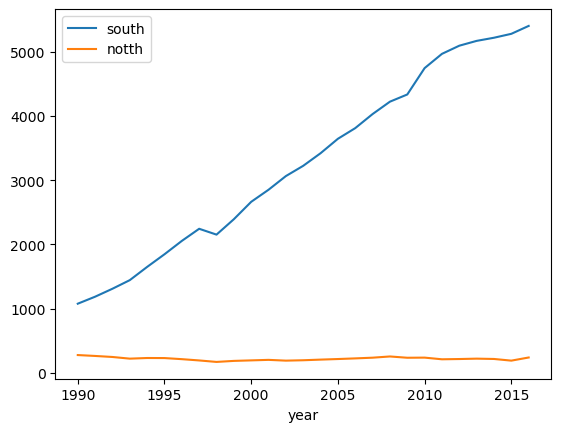

In [33]:
df_ep.plot()

<Axes: xlabel='year'>

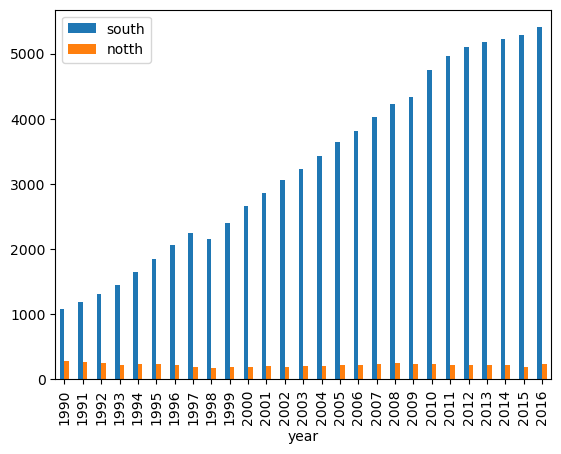

In [34]:
df_ep.plot(kind = 'bar')

<Axes: ylabel='Frequency'>

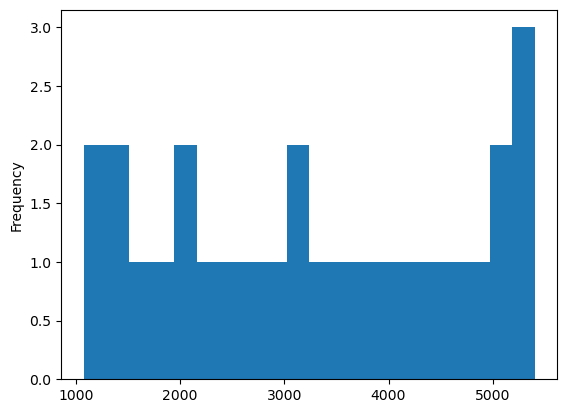

In [38]:
# df_ep.south.plot(kind = 'hist')
df_ep.south.plot.hist(bins=20) # 구간을 임의로 20개로 나누는 것

<Axes: >

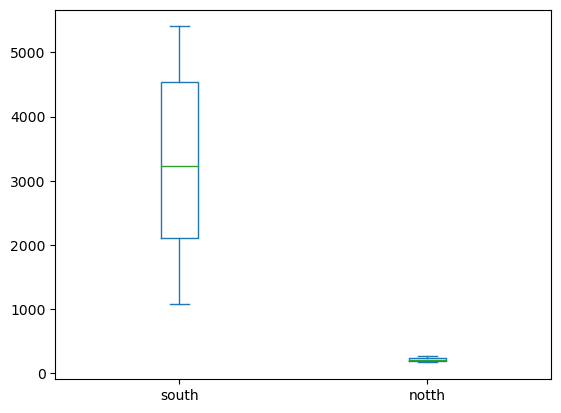

In [39]:
df_ep.plot(kind='box') # 남한의 단위가 너무 커서 북한이 잘 보이지 않음. 만약 북한을 자세히 보고 싶으면 따로 봐야 한다.

<Axes: >

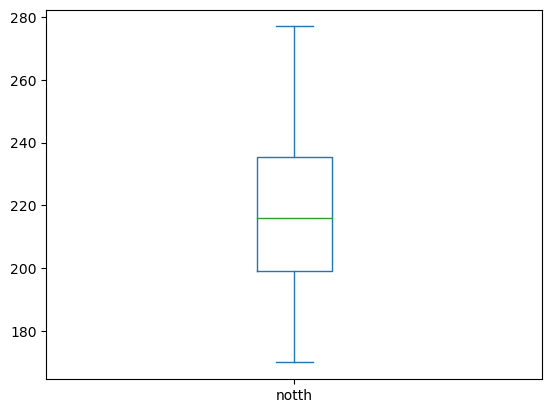

In [41]:
df_ep.notth.plot(kind='box')

In [42]:
df_auto = pd.read_excel('dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<Axes: xlabel='weight', ylabel='mpg'>

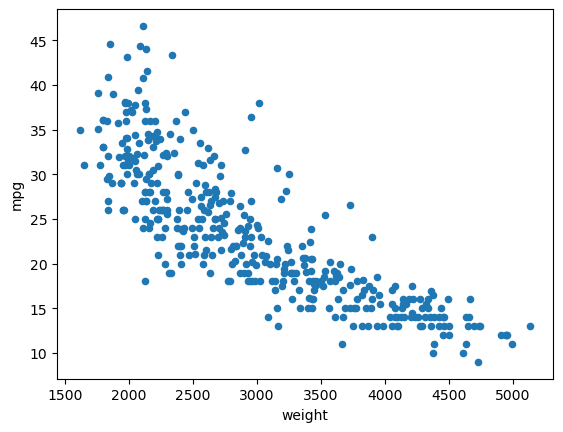

In [43]:
df_auto.plot(x='weight',y='mpg', kind='scatter')

파이썬 datetime 모듈
- 기본 개념: datetime 모듈은 날짜 및 시간을 다루는 기본적인 클래스들(date, time, datetime, timedelta, tzinfo)을 제공
- 날짜 생성 및 조작: 특정 날짜를 생성하거나 날짜 간의 차이를 계산하는 등의 기능을 수행
- 포맷팅: strftime()을 사용하여 날짜를 문자열로, strptime()을 사용하여 문자열을 날짜로 변환
- 시간대 처리: 시간대를 처리하는 기능을 포함하고 있지만, 별도의 라이브러리(pytz 등)의 도움이 필요

판다스
- 시계열 데이터 처리에 최적화: 판다스는 시계열 데이터 처리에 특화되어 있으며, 대량의 날짜 데이터를 빠르고 효율적으로 처리할 수 있다.
- DateTimeIndex: 판다스는 DateTimeIndex를 제공하여 시계열 데이터의 인덱싱과 슬라이싱을 간편하게 한다.
- 시간대 처리: 판다스는 내장된 시간대 처리 기능을 제공하며, 시간대 변환을 손쉽게 할 수 있다.
- 날짜 데이터 변환 및 조작: to_datetime() 함수로 다양한 형식의 날짜 문자열을 datetime 객체로 변환할 수 있다. 또한, resample, asfreq 등의 메서드로 시계열 데이터의 빈도를 변경하는 등 다양한 날짜 관련 조작을 지원.
- 통합된 데이터 처리: 판다스는 DataFrame이나 Series 내의 날짜 데이터를 다룰 때, 다른 데이터 유형과의 통합된 처리가 가능.

포인트
- 파이썬 datetime: 날짜 및 시간의 기본적인 처리에 적합하며, 작고 단순한 날짜 관련 작업에 이상적이다.
- 판다스: 대규모 데이터셋에서 복잡하고 고급 시계열 데이터 처리에 적합하며, 데이터 분석과 관련된 다양한 기능을 제공한다.
- 사용 사례에 따라 적절한 도구를 선택하는 것이 중요. 작은 규모의 기본적인 날짜 연산에는 datetime을, 복잡한 데이터셋과 시계열 분석에는 판다스를 사용하는 것이 일반적.

Python의 datetime 모듈을 사용한 날짜 처리 예시. 이 예제들은 datetime 모듈을 사용하여 날짜 및 시간 데이터를 다루는 기본적인 방법을 보여준다.

- 현재 날짜 및 시간 얻기: datetime.now()를 사용.
- 특정 날짜 및 시간 생성: datetime 객체를 직접 생성.
- 날짜 간 차이 계산: timedelta를 사용.
- 날짜 포맷팅: 날짜를 문자열로 변환하거나 문자열로부터 날짜를 파싱.
- 날짜와 시간 요소 접근: 날짜의 연도, 월, 일 등을 접근.

판다스를 사용한 날짜 처리의 예. 이 예제들은 판다스가 시계열 데이터를 어떻게 다룰 수 있는지 보여준다.

- 날짜 범위 생성: pd.date_range()를 사용하여 날짜 범위를 생성.
- 날짜 변환: 문자열을 pd.to_datetime()을 사용하여 날짜 객체로 변환.
- 시계열 데이터 생성: 날짜를 인덱스로 사용하는 시계열 데이터를 생성.
- 날짜 기반 필터링: 특정 날짜 조건을 만족하는 데이터를 필터링.
- 시계열 데이터 리샘플링: 월별 평균 등으로 데이터를 리샘플링.
- 이 코드를 실행하면, 판다스를 사용하여 날짜 데이터를 다양하게 처리하는 방법을 확인할 수 있다. 날짜 범위 생성, 날짜 변환, 시계열 데이터 처리 등은 데이터 분석에서 매우 유용하게 활용.

In [54]:
from datetime import datetime, timedelta

diff = timedelta(days=1)
yesterday = datetime.now()-diff
print(yesterday)

2023-11-29 11:30:13.558257


In [59]:
# 특정 날짜 및 시간 생성 - (2020, 1, 1, 10, 30)
from datetime import datetime
date1 = datetime(2020, 1, 1, 10, 30)
print(date1)

2020-01-01 10:30:00


과제6_1130. 현재 날짜를 다음 포멧으로 문자열로 변환하여 출력하세요. 2023-11-30 11:29:25

In [68]:
from datetime import datetime
today = datetime.now()
today_format = today.strftime("%Y-%m-%d %H:%M:%S")
print(today_format)
#스트링포타임

2023-11-30 13:03:07


과제7_1130. "2020-01-01"을 datetime 형식으로 출력하세요.

In [71]:
from datetime import datetime
d1 = datetime.strptime("2020-01-01","%Y-%m-%d")
print(d1)
#스트링파싱타임

2020-01-01 00:00:00


과제8_11303. 현재 날짜를 다음 포멧으로 출력하세요. "년: 2023 월: 11 일: 30"

In [66]:
from datetime import datetime
today_f = datetime.now().strftime("년: %Y 월: %m 일: %d")
print(today_f)

년: 2023 월: 11 일: 30


In [72]:
now = datetime.now()
year = now.year
month = now.month
day = now.day
print("년:",year, "월:",month, "일:", day)

년: 2023 월: 11 일: 30


판다스 날짜 사용 예제

In [75]:
import pandas as pd
date_range = pd.date_range(start = '2020-01-01', end='2020-01-10')
date_range
# 데이터타입이 datetime64 라는 것은 판다스라고 생각하면 된다.

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [82]:
# 날짜 변환
dates = ['2020-01-01','2020-01-05','2020-01-10']
date_objects = pd.to_datetime(dates)
date_objects

DatetimeIndex(['2020-01-01', '2020-01-05', '2020-01-10'], dtype='datetime64[ns]', freq=None)

In [83]:
# 시계열 데이터 생성
data = pd.Series([1,2,3],index=pd.to_datetime(['2020-01-01','2020-01-02','2020-01-03']))
data

2020-01-01    1
2020-01-02    2
2020-01-03    3
dtype: int64

In [86]:
filtered_data = data['2020-01-01':'2020-01-03']
filtered_data

2020-01-01    1
2020-01-02    2
2020-01-03    3
dtype: int64

In [87]:
# 시계열 데이터 리샘플링, 월별 평균
resample_data = data.resample('M').mean()
resample_data

2020-01-31    2.0
Freq: M, dtype: float64

In [132]:
df = pd.read_csv('dataset/stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [110]:
df.info() # object을 datetime으로 만들어야 한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [133]:
df['New_Date'] = pd.to_datetime(df['Date'])
df

,Date,Close,Start,High,Low,Volume,New_Date
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26
5,2018-06-25,11150,11400,11450,11000,55519,2018-06-25
6,2018-06-22,11300,11250,11450,10750,134805,2018-06-22
7,2018-06-21,11200,11350,11750,11200,133002,2018-06-21
8,2018-06-20,11550,11200,11600,10900,308596,2018-06-20
9,2018-06-19,11300,11850,11950,11300,180656,2018-06-19


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   New_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


과제9_1130. Date 컬럼은 삭제하고 New_Date로 부터 year, month, day 컬럼을 추가로 생성한 후 데이터프레임을 출력하세요.

In [134]:
df.drop('Date',axis=1,inplace=True)
df['year'] = df['New_Date'].dt.year
df['month'] = df['New_Date'].dt.month
df['day'] = df['New_Date'].dt.day
df

,Close,Start,High,Low,Volume,New_Date,year,month,day
0,10100,10850,10900,10000,137977,2018-07-02,2018,7,2
1,10700,10550,10900,9990,170253,2018-06-29,2018,6,29
2,10400,10900,10950,10150,155769,2018-06-28,2018,6,28
3,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,10800,10900,11000,10700,63039,2018-06-26,2018,6,26
5,11150,11400,11450,11000,55519,2018-06-25,2018,6,25
6,11300,11250,11450,10750,134805,2018-06-22,2018,6,22
7,11200,11350,11750,11200,133002,2018-06-21,2018,6,21
8,11550,11200,11600,10900,308596,2018-06-20,2018,6,20
9,11300,11850,11950,11300,180656,2018-06-19,2018,6,19


과제10_1130. New_Date를 df의 인덱스로 변경하세요.

In [135]:
df = df.set_index('New_Date')
df

,Close,Start,High,Low,Volume,year,month,day
New_Date,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2
2018-06-29,10700,10550,10900,9990,170253,2018,6,29
2018-06-28,10400,10900,10950,10150,155769,2018,6,28
2018-06-27,10900,10800,11050,10500,133548,2018,6,27
2018-06-26,10800,10900,11000,10700,63039,2018,6,26
2018-06-25,11150,11400,11450,11000,55519,2018,6,25
2018-06-22,11300,11250,11450,10750,134805,2018,6,22
2018-06-21,11200,11350,11750,11200,133002,2018,6,21
2018-06-20,11550,11200,11600,10900,308596,2018,6,20


과제11_1130. '2018-06-26':'2018-06-29' 기간의 데이터만 출력하세요.

In [136]:
df.sort_index(inplace=True) # 거꾸로 되어있으면 에러가 난다. 그래서 정렬 후 슬라이싱 해야 함.
df_ymd_range = df.loc['2018-06-26':'2018-06-29']
df_ymd_range

,Close,Start,High,Low,Volume,year,month,day
New_Date,,,,,,,,
2018-06-26,10800,10900,11000,10700,63039,2018,6,26
2018-06-27,10900,10800,11050,10500,133548,2018,6,27
2018-06-28,10400,10900,10950,10150,155769,2018,6,28
2018-06-29,10700,10550,10900,9990,170253,2018,6,29


과제12_1130. '2018-7' 월의 'Start'와 'High' 데이터만 출력하세요.

In [137]:
selected = df.loc['2018-07','Start':'High']
selected

,Start,High
New_Date,,
2018-07-02,10850,10900


과제13_1130. 시계열 인덱스로 구성되는 데이터 프레임을 작성하세요. (시계열 인덱스는 최근 1개월을 일별로 표시, 컬럼은 자유롭게 구성

In [140]:
import numpy as np
import pandas as pd

np.random.seed(0)
data = np.random.randint(1,5,size=(30,4))
date_range = pd.date_range(start = '2023-11-01', end='2023-11-30')
df_13 = pd.DataFrame(data,index=date_range, columns = ['Study','TV','Reading','Cafe'])
df_13

,Study,TV,Reading,Cafe
2023-11-01,1,4,2,1
2023-11-02,4,4,4,4
2023-11-03,2,4,2,3
2023-11-04,1,4,3,1
2023-11-05,1,1,3,2
2023-11-06,3,4,4,3
2023-11-07,1,2,2,2
2023-11-08,2,1,2,1
2023-11-09,4,1,4,2
2023-11-10,3,4,4,1


In [ ]:
from datetime import datetime, timedelta

end_date = datetime.now()

start_date = end_date - timedelta(days=30)
date_range = pd.date_range(start_date, end_date, freq='D')

data = {
    'Temperature': np.random.randint(0, 15, size=len(date_range)),
    'Humidity': np.random.randint(10, 100, size=len(date_range)),
    'Wind_Speed': np.random.randint(0, 10, size=len(date_range)),
    'Rainfall': np.random.randint(0, 5, size=len(date_range))
}

df = pd.DataFrame(data, index=date_range)

df

과제14_1130. 오늘 날짜로부터 1년간의 일별 운동시간과 수면시간의 시계열 자료를 데이터프레임으로 작성하세요.

In [174]:
import numpy as np
import pandas as pd

np.random.seed(0)
sleep = np.random.randint(5,13,size=365)
exercise = np.random.randint(1,3, size =365)
one_year = pd.date_range(start = '2023-11-30', end = '2024-11-28')
df_14 = pd.concat([pd.Series(sleep),pd.Series(exercise)],axis=1)
df_14.columns = ['sleep','exercise']
df_14.index = one_year
df_14

,sleep,exercise
2023-11-30,9,1
2023-12-01,12,1
2023-12-02,10,1
2023-12-03,5,2
2023-12-04,8,2
...,...,...
2024-11-24,5,2
2024-11-25,8,1
2024-11-26,5,2
2024-11-27,8,2


과제15_1130. 오늘부터 3개월간 매주 수요일 운동을 할 계획을 세웁니다(총 12회). 시계열로 운동시간을 나타내는 데이터프레임을 작성하세요. (freq = 'W-WED': 생성될 날짜들의 빈도(frequency)를 지정. 'W-WED' 는 매주 수요일을 의미

In [201]:
three_months = pd.date_range(start = '2023-11-30', periods = 12, freq = 'W-WED')
data_e = {'exercise': np.random.randint(1,3, size = len(three_months))}
df_15 = pd.DataFrame(data_e, index=three_months)
df_15 

,exercise
2023-12-06,2
2023-12-13,2
2023-12-20,1
2023-12-27,2
2024-01-03,1
2024-01-10,1
2024-01-17,1
2024-01-24,1
2024-01-31,2
2024-02-07,1


In [1]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age','fare','survived','class']]
df.head()

,age,fare,survived,class
0,22.0,7.2500,0,Third
1,38.0,71.2833,1,First
2,26.0,7.9250,1,Third
3,35.0,53.1000,1,First
4,35.0,8.0500,0,Third


In [2]:
import warnings
warnings.filterwarnings('ignore')
grouped = df.groupby(['class'])
grouped

In [3]:
list(grouped)

[(('First',),
        age     fare  survived  class
  1    38.0  71.2833         1  First
  3    35.0  53.1000         1  First
  6    54.0  51.8625         0  First
  11   58.0  26.5500         1  First
  23   28.0  35.5000         1  First
  ..    ...      ...       ...    ...
  871  47.0  52.5542         1  First
  872  33.0   5.0000         0  First
  879  56.0  83.1583         1  First
  887  19.0  30.0000         1  First
  889  26.0  30.0000         1  First
  
  [216 rows x 4 columns]),
 (('Second',),
        age     fare  survived   class
  9    14.0  30.0708         1  Second
  15   55.0  16.0000         1  Second
  17    NaN  13.0000         1  Second
  20   35.0  26.0000         0  Second
  21   34.0  13.0000         1  Second
  ..    ...      ...       ...     ...
  866  27.0  13.8583         1  Second
  874  28.0  24.0000         1  Second
  880  25.0  26.0000         1  Second
  883  28.0  10.5000         0  Second
  886  27.0  13.0000         0  Second
  
  [184 rows x 

In [4]:
mean_all = grouped.mean()
print(mean_all,type(mean_all))

              age       fare  survived
class                                 
First   38.233441  84.154687  0.629630
Second  29.877630  20.662183  0.472826
Third   25.140620  13.675550  0.242363 <class 'pandas.core.frame.DataFrame'>


In [5]:
std_all = grouped.std()
std_all

,age,fare,survived
class,,,
First,14.802856,78.380373,0.484026
Second,14.001077,13.417399,0.500623
Third,12.495398,11.778142,0.428949


In [218]:
std_fare = grouped.fare.std()
std_fare

class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64

In [239]:
# Q. 각 그룹의 최대값과 최소값의 차이를 계산하여 그룹별로 집계
min_all = grouped.min()
max_all = grouped.max()
max_min_diff = max_all - min_all
max_min_diff

,age,fare,survived
class,,,
First,79.08,512.3292,1
Second,69.33,73.5000,1
Third,73.58,69.5500,1


In [240]:
def min_max(x):
    return x.max() - x.min()

agg_minmax = grouped.agg(min_max)
agg_minmax

,age,fare,survived
class,,,
First,79.08,512.3292,1
Second,69.33,73.5000,1
Third,73.58,69.5500,1


과제16_1130. 모든 컬럼에 min, max 함수를 적용하여 출력하세요.

In [242]:
grouped.agg({'min','max'})

age       fare           survived    
         min   max  min       max      min max
class                                         
First   0.92  80.0  0.0  512.3292        0   1
Second  0.67  70.0  0.0   73.5000        0   1
Third   0.42  74.0  0.0   69.5500        0   1

과제17_1130. fare 컬럼에는 min, max 함수를 age 컬럼에는 mean 함수를 적용하여 출력하세요.

In [7]:
grouped.agg({'fare':['min','max'],'age':'mean'})

fare                  age
        min       max       mean
class                           
First   0.0  512.3292  38.233441
Second  0.0   73.5000  29.877630
Third   0.0   69.5500  25.140620

In [38]:
df.filter(like = 'age',axis=1).head() 

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


도전과제18_1130. 데이터 갯수가 200개 이상인 그룹만을 필터링하여 데이터프레임으로 출력하세요.

In [ ]:
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0

In [263]:
grouped.filter(lambda x: len(x) >=200)

,age,fare,survived,class
0,22.0,7.2500,0,Third
1,38.0,71.2833,1,First
2,26.0,7.9250,1,Third
3,35.0,53.1000,1,First
4,35.0,8.0500,0,Third
...,...,...,...,...
885,39.0,29.1250,0,Third
887,19.0,30.0000,1,First
888,NaN,23.4500,0,Third
889,26.0,30.0000,1,First


In [282]:
grouped.agg(lambda x: len(x) >=200)

,age,fare,survived
class,,,
First,True,True,True
Second,False,False,False
Third,True,True,True


도전과제19_1130. age 열의 평균이 30보다 작은 그룹만을 필터링하여 데이터프레임으로 반환하여 age_filter 이름으로 저장 후 끝에서 5개행을 출력하세요.

In [9]:
age_filter = grouped.filter(lambda x: x['age'].mean() < 30)
age_filter.tail()

,age,fare,survived,class
884,25.0,7.050,0,Third
885,39.0,29.125,0,Third
886,27.0,13.000,0,Second
888,NaN,23.450,0,Third
890,32.0,7.750,0,Third


In [287]:
grouped['age'].mean() < 30

class
First     False
Second     True
Third      True
Name: age, dtype: bool

과제20_1130. 각 그룹별 요약 통계정보를 집계하세요.

In [258]:
grouped.describe()

age                                                       fare  \
        count       mean        std   min   25%   50%   75%   max  count   
class                                                                      
First   186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0  216.0   
Second  173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0  184.0   
Third   355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0  491.0   

                   ...                 survived                                \
             mean  ...   75%       max    count      mean       std  min  25%   
class              ...                                                          
First   84.154687  ...  93.5  512.3292    216.0  0.629630  0.484026  0.0  0.0   
Second  20.662183  ...  26.0   73.5000    184.0  0.472826  0.500623  0.0  0.0   
Third   13.675550  ...  15.5   69.5500    491.0  0.242363  0.428949  0.0  0.0   

                       
        50%  75%  max  
class                  
First   1.0  1.0  1.0  
Second  0.0  1.0  1.0  
Third   0.0  0.0  1.0  

[3 rows x 24 columns]

In [10]:
agg_grouped = grouped.apply(lambda x:x.describe())
print(agg_grouped)

                     age        fare    survived
class                                           
First  count  186.000000  216.000000  216.000000
       mean    38.233441   84.154687    0.629630
       std     14.802856   78.380373    0.484026
       min      0.920000    0.000000    0.000000
       25%     27.000000   30.923950    0.000000
       50%     37.000000   60.287500    1.000000
       75%     49.000000   93.500000    1.000000
       max     80.000000  512.329200    1.000000
Second count  173.000000  184.000000  184.000000
       mean    29.877630   20.662183    0.472826
       std     14.001077   13.417399    0.500623
       min      0.670000    0.000000    0.000000
       25%     23.000000   13.000000    0.000000
       50%     29.000000   14.250000    0.000000
       75%     36.000000   26.000000    1.000000
       max     70.000000   73.500000    1.000000
Third  count  355.000000  491.000000  491.000000
       mean    25.140620   13.675550    0.242363
       std     12.49

In [18]:
import seaborn as sns
df = sns.load_dataset('titanic')
df[['class','sex','age']].head()

,class,sex,age
0,Third,male,22.0
1,First,female,38.0
2,Third,female,26.0
3,First,female,35.0
4,Third,male,35.0


In [13]:
pdf1 = df.pivot_table(index='class',columns='sex',values='age')
pdf1

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [16]:
import pandas as pd
pdf2 = pd.pivot_table(df,index = 'class',
                     columns = 'sex',
                     values = 'age',
                     aggfunc = 'mean')
pdf2

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [21]:
# Q. df에서 pivot_table을 이용해서 클래스별 성별 생존율을 구하세요.
pdf3 = pd.pivot_table(df,index = 'class',
                     columns = 'sex',
                     values = 'survived',
                     aggfunc = 'mean')
pdf3

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


In [27]:
pdf4 = pd.pivot_table(df, index = 'class',columns = 'sex', values = 'survived', aggfunc = ['mean','sum'])
pdf4

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

In [30]:
index = ['class','sex']
columns = 'survived'
values = ['age','fare']
aggfunc = ['mean','max']
pdf5 = pd.pivot_table(df,
                     index = index,
                     columns = columns,
                     values = values,
                     aggfunc = aggfunc)
pdf5

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  
       male     69.55   56.4958